In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import zipfile
# Upload dataset onto google Colab
# Extract dataset .zip file to colab
zip_file_path = "/content/custom-model_100.zip"
extract_to_directory = "/content"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

In [3]:
import zipfile
# Upload dataset onto google Colab
# Extract dataset .zip file to colab
zip_file_path = "/content/test.zip"
extract_to_directory = "/content"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

In [4]:
import os
input_path = "/content/test"
# Function to delete .DS_Store files
def delete_ds_store(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file == ".DS_Store":
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Deleted {file_path}")

# Call the function to delete .DS_Store files
delete_ds_store(input_path)


# DETR - Detection Transformer
Reference: https://github.com/NielsRogge/Transformers-Tutorials/blob/master/DETR/Fine_tuning_DetrForObjectDetection_on_custom_dataset_(balloon).ipynb


Original DETR paper: https://arxiv.org/abs/2005.12872

Original DETR repo: https://github.com/facebookresearch/detr


In [5]:
# !python --version

Python 3.10.12


In [1]:
# !python -m pip install --upgrade pip

# !pip install supervision==0.3.0

# !pip install transformers

# !pip install pytorch-lightning

# !pip install timm

# !pip install cython

# !pip install pycocotools

# !pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 

In [ ]:
# !pip --version

pip 24.0 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [6]:
import torch
torch.__version__

'2.2.1+cu121'

In [7]:
import supervision
import transformers

supervision.__version__ , transformers.__version__

('0.3.0', '4.38.2')

In [8]:
import pytorch_lightning
print(pytorch_lightning.__version__)

2.2.1


# Save and load model

In [9]:
import timm
from transformers import DetrImageProcessor

In [12]:
from transformers import DetrForObjectDetection
MODEL_PATH = '/content/custom-model_100'

In [13]:
# loading model
model = DetrForObjectDetection.from_pretrained(MODEL_PATH)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(DEVICE)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

In [14]:
box_annotator = supervision.BoxAnnotator()

In [15]:
image_processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

preprocessor_config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


# Inference on test dataset (image)

Let's visualize the predictions of DETR on the first image of the validation set.

In [21]:
import os
import torchvision
from transformers import DetrImageProcessor

dataset_test = '/content/test'

ANNOTATION_FILE_NAME = "annotation.json"
TEST_DIRECTORY = os.path.join(dataset_test)


class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(
        self,
        image_directory_path: str,
        image_processor,
        train: bool = True
    ):
        annotation_file_path = os.path.join(image_directory_path, ANNOTATION_FILE_NAME)
        super(CocoDetection, self).__init__(image_directory_path, annotation_file_path)
        self.image_processor = image_processor

    def __getitem__(self, idx):
        images, annotations = super(CocoDetection, self).__getitem__(idx)
        image_id = self.ids[idx]
        annotations = {'image_id': image_id, 'annotations': annotations}
        encoding = self.image_processor(images=images, annotations=annotations, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()
        target = encoding["labels"][0]

        return pixel_values, target

image_processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

TEST_DATASET = CocoDetection(image_directory_path=TEST_DIRECTORY, image_processor=image_processor, train=False)

print("Number of test examples:", len(TEST_DATASET))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Number of test examples: 242


Image #629


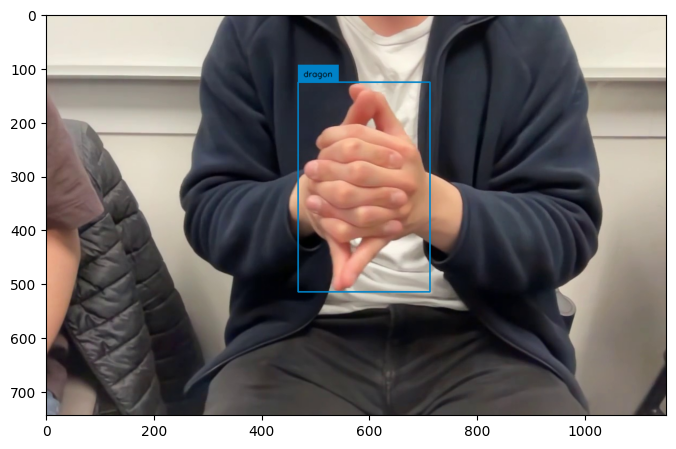

In [22]:
# Visualize if dataset is loaded properly

import random
import cv2
import numpy as np


# select random image
image_ids = TEST_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# annotate
detections = supervision.Detections.from_coco_annotations(coco_annotation=annotations)

# we will use id2label function for training
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}

labels = [
    f"{id2label[class_id]}"
    for _, _, class_id, _
    in detections
]

box_annotator = supervision.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)

%matplotlib inline
supervision.show_frame_in_notebook(image, (8, 8))

In [23]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    pixel_values = [item[0] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")
    labels = [item[1] for item in batch]
    return {
        'pixel_values': encoding['pixel_values'],
        'pixel_mask': encoding['pixel_mask'],
        'labels': labels
    }

TEST_DATALOADER = DataLoader(dataset=TEST_DATASET, collate_fn=collate_fn, batch_size=4)

Image #1299
{'width': 852, 'height': 480, 'id': 1299, 'file_name': 'monkey_henry_00074.jpg'}


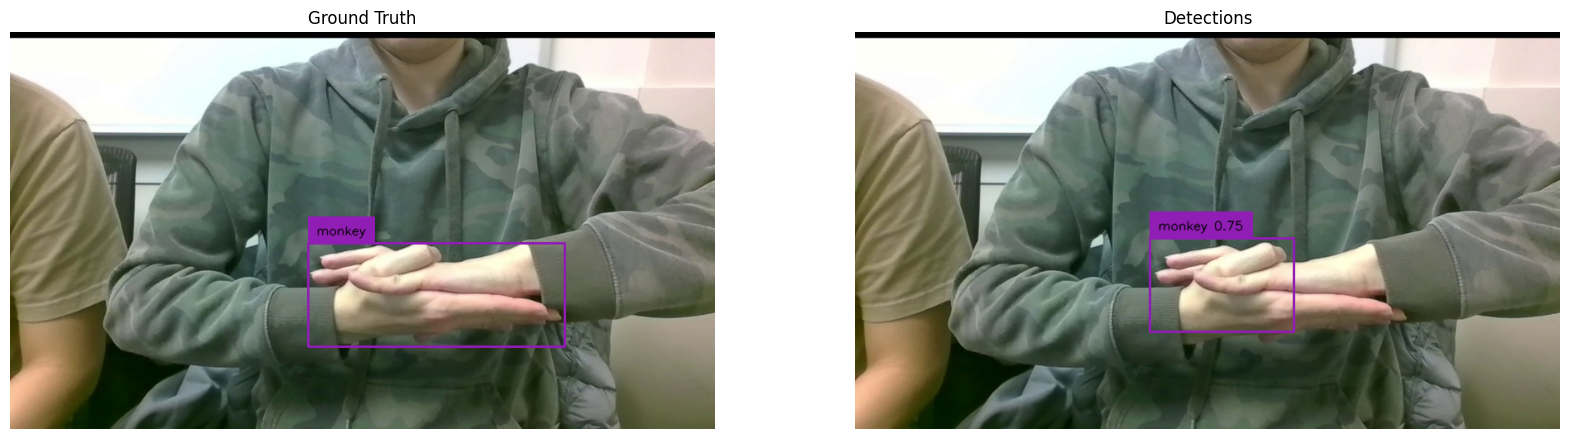

In [24]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt


# utils
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}
box_annotator = supervision.BoxAnnotator()

# select random image
image_ids = TEST_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TEST_DATASET.coco.loadImgs(image_id)[0]
print(image)
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# Annotate ground truth
detections = supervision.Detections.from_coco_annotations(coco_annotation=annotations)
labels = [f"{id2label[class_id]}" for _, _, class_id, _ in detections]
frame_ground_truth = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

# CONFIDENCE_THRESHOLD = 0.5
# Annotate detections
with torch.no_grad():

    # load image and predict
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=0.5,
        target_sizes=target_sizes
    )[0]


    detections = supervision.Detections.from_transformers(transformers_results=results)
    labels = [f"{id2label[class_id]} {confidence:.2f}" for _, confidence, class_id, _ in detections]
    frame_detections = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)


# %matplotlib inline # Remove this line, we won't use it anymore

# Combine both images side by side and display
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(cv2.cvtColor(frame_ground_truth, cv2.COLOR_BGR2RGB))
axs[0].axis('off')
axs[0].set_title('Ground Truth')

axs[1].imshow(cv2.cvtColor(frame_detections, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].set_title('Detections')

plt.show()


# Inference for video or real-time

In [33]:
import cv2
import torch
import matplotlib.pyplot as plt


# Define the video file path or camera index
output_video_path = 'output_video.mp4'
video_path = "/content/video.mp4"  # Change this to your video file path
# Or use a camera stream by providing the camera index (0 for the default camera)
# video_path = 0
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
output_video = cv2.VideoWriter(output_video_path, fourcc, fps, (1080, 1080))

# Create a VideoCapture object to read the video
cap = cv2.VideoCapture(video_path)


In [34]:
# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Unable to open video.")
    exit()

In [ ]:
from google.colab.patches import cv2_imshow
# Loop through the video frames
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if the frame was read successfully
    if not ret:
        print("Error: Unable to read frame.")
        break

    # Perform object detection on the frame
    with torch.no_grad():
        # Load image and predict
        inputs = image_processor(images=frame, return_tensors='pt').to(DEVICE)
        outputs = model(**inputs)

        # Post-process
        target_sizes = torch.tensor([frame.shape[:2]]).to(DEVICE)
        results = image_processor.post_process_object_detection(
            outputs=outputs,
            threshold=0.5,
            target_sizes=target_sizes
        )[0]

        # Extract detections
        detections = supervision.Detections.from_transformers(transformers_results=results)
        labels = [f"{id2label[class_id]} {confidence:.2f}" for _, confidence, class_id, _ in detections]
        frame_detections = box_annotator.annotate(scene=frame.copy(), detections=detections, labels=labels)

    output_video.write(frame_detections)
    # Display the frame with detections
    cv2_imshow(frame_detections)

    # Check for the 'q' key to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [36]:
# Release the VideoCapture and close all OpenCV windows
cap.release()
output_video.release()
cv2.destroyAllWindows()